In [5]:
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import itertools
import os
import pandas as pd

In [55]:
data_dir="/data/rmthomas/HeteroSmallSample"
df = pd.read_csv(os.path.join(data_dir, "real_data.csv"))
df = df[df.columns[25:125]] # these are features we used 

# percentage of missing data (nan) per feature
nan_ratio_per_feature = np.sum(np.isnan(df.values),axis=0)/df.values.shape[0]

In [67]:
# load the simulated data
df_full = pd.read_csv(os.path.join(data_dir, "simulated_data.csv"), index_col=0)
df_nan = df_full.copy()

In [57]:
# Set elements to missing (nan) with the same probability as the real data
N = df_full.shape[0]
for i, percent_missing in enumerate(nan_ratio_per_feature):
    df_nan.loc[np.random.random_sample((N)) < percent_missing, f'f{i}'] = np.nan
    

In [68]:
df_full['Dx'].value_counts()

0    2757
1    2182
Name: Dx, dtype: int64

/data/rmthomas/anaconda3/envs/py36ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/data/rmthomas/anaconda3/envs/py36ml/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


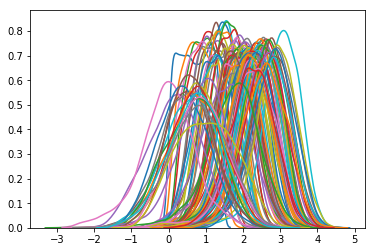

In [79]:
for i in range(100):
    sns.kdeplot(df_full[f'f{i}'], legend=False)
